# Homework 2

## Pair Programming Group Number: 4
## Members of Team: Alex Chiu, Ella Jiang

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

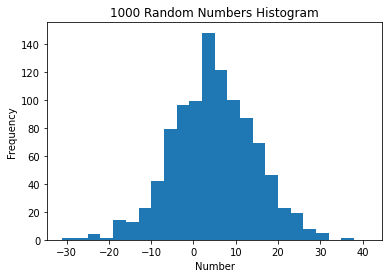

In [2]:
# Generate vector of 1000 random numbers
random1k = np.random.normal(5, 10, 1000)

# Create bins for histogram
bins = []
for i in range(25):
    bins.append(5 + 3 * (i - 12))

# Plot histogram
plt.hist(random1k, bins)
plt.title("1000 Random Numbers Histogram")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  If can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

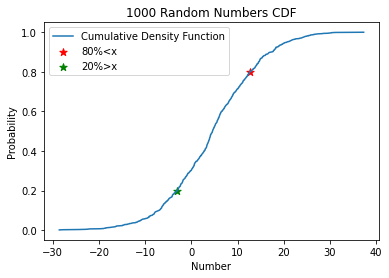

In [11]:
# Sort the previously generated vector of 1000 values
sorted1k = np.sort(random1k)

# Determine steps for CDF
cdf = []
for i in range(len(sorted1k)):
    cdf.append((i + 1) / 1000.)
    
# Plot CDF
plt.plot(sorted1k,cdf)
plt.title("1000 Random Numbers CDF")
plt.xlabel("Number")
plt.ylabel("Probability")

# Graph the 20% and 80% points
plt.scatter(sorted1k[800-1], cdf[800-1], marker="*", c="r", s=60)
plt.scatter(sorted1k[200-1], cdf[200-1], marker="*", c="g", s=60)

plt.legend(["Cumulative Density Function","80%<x","20%>x"])
plt.show()

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `groupby`. 

In [4]:
# Initial test script
# df = pd.read_csv("melb_data.csv")
# boxwhis = df[df["Suburb"]=="Reservoir"]["Price"]
# richmond = df[df["Suburb"]=="Richmond"]["Price"]
# bentleigh = df[df["Suburb"]=="Bentleigh East"]["Price"]
# plt.boxplot([reservoir,richmond,bentleigh],labels = ["Reservoir","Richmond","Bentleigh East"] )
# plt.show()

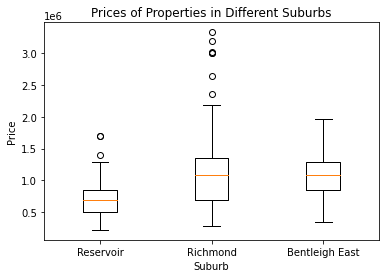

In [5]:
# Read in data frame
df = pd.read_csv("melb_data.csv")

# Group price data by suburb
groupbySub = df.groupby("Suburb")["Price"]

# Plot the prices in a box plot
plt.boxplot([groupbySub.get_group("Reservoir"), groupbySub.get_group("Richmond"), groupbySub.get_group("Bentleigh East")], labels = ["Reservoir","Richmond","Bentleigh East"] )
plt.xlabel("Suburb")
plt.ylabel("Price")
plt.title("Prices of Properties in Different Suburbs")
plt.show()

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

In [68]:
# Create alpha and beta vectors
alpha = np.array([1, 1])
beta = np.array([-1, 0])

# Create rotation matrix
theta = np.pi/4
rot = [[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]

In [69]:
# Rotate both vectors
# Note: as alpha and beta are not unit vectors, applying the rotation matrix changes their norms
rot_alpha = np.matmul(rot, alpha)
rot_beta = np.matmul(rot, beta)

In [70]:
# Print out resulting vectors
print("Rotated alpha = [ " + str(rot_alpha[0]) + " , " + str(rot_alpha[1]) + " ]")
print("Rotated beta = [ " + str(rot_beta[0]) + " , " + str(rot_beta[1]) + " ]")
print("Both rotations are counter clockwise")

Rotated alpha = [ 0.0 , 1.0 ]
Rotated beta = [ -0.7071067811865476 , -0.7071067811865476 ]
Both rotations are counter clockwise


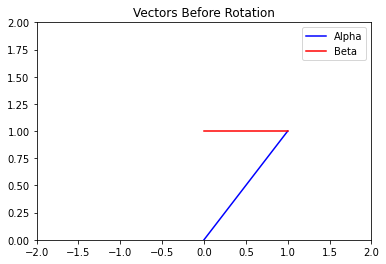

In [75]:
# Plot vectors before rotation
plt.figure()
plt.plot([0, 0 + alpha[0]], [0, 0 + alpha[1]], color='b')
plt.plot([1, 1 + beta[0]], [1, 1 + beta[1]], color='r')
plt.xlim([-2, 2])
plt.ylim([0, 2])
plt.title("Vectors Before Rotation")
plt.legend(["Alpha", "Beta"])
plt.show()

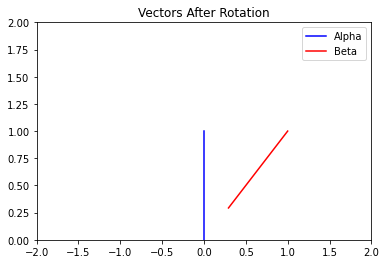

In [74]:
# Plot the vectors after rotation
plt.figure()
plt.plot([0, 0 + rot_alpha[0]], [0, 0 + rot_alpha[1]], color='b')
plt.plot([1, 1 + rot_beta[0]], [1, 1 + rot_beta[1]], color='r')
plt.xlim([-2, 2])
plt.ylim([0, 2])
plt.title("Vectors After Rotation")
plt.legend(["Alpha", "Beta"])
plt.show()

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [76]:
A = np.array([[2,1,1],[4,-6,0],[-2,7,2]])
B = np.array([[5],[-2],[9]])
ans = np.matmul(np.linalg.inv(A),B)
print("x = " +str(ans[0][0]) + "\ny = "+str(ans[1][0]) + "\nz = "+str(ans[2][0]))

x = 1.0
y = 1.0
z = 2.0


In [10]:
#np.matmul(A,ans)